**Time Series Analysis and Forecasting**

In [ ]:
#Import Libraries
import os
import numpy as np
import scipy as sp
import pandas as pd
import datetime
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from fbprophet import Prophet
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Make your plots higher resolution
%config InlineBackend.figure_format = 'retina'
plt.ion()
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14

In [ ]:
# to specified directory 
os.chdir(r"/content/drive/My Drive/Python_Stats/Time Series Analysis and Forecasting/Dataset")

**Class Examples**-Time Series Analysis and Forecasting the Count of Cycle Hiring Using ARIMA

In [ ]:
# reading the data
df = pd.read_csv("Avg_Monthly_Cycle_Hiring_Count.csv")

In [ ]:
df.head(10)

,Year_Month,Cycle_Hiring_Count
0,2001-01,648
1,2001-02,646
2,2001-03,639
3,2001-04,654
4,2001-05,630
5,2001-06,622
6,2001-07,617
7,2001-08,613
8,2001-09,661
9,2001-10,695


In [ ]:
# Check data types
df.dtypes

Year_Month            object
Cycle_Hiring_Count     int64
dtype: object

In [ ]:
#Data Preparation & EDA
#Checking structure of the data
df.shape

(114, 2)

In [ ]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year_Month          114 non-null    object
 1   Cycle_Hiring_Count  114 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [ ]:
# EDA 5 Point Statistical analysis
df.describe()

,Cycle_Hiring_Count
count,114.000000
mean,1120.543860
std,270.888317
min,613.000000
25%,885.000000
50%,1158.000000
75%,1340.000000
max,1558.000000


In [ ]:
#Changing datatype of both the columns
#Assign int to Cycle_Hiring_Count column¶
#Assign datetime to Year_Month column
# Changing data type
df['Cycle_Hiring_Count'] = df['Cycle_Hiring_Count'].astype(np.int32)
df['Year_Month'] = pd.to_datetime(df['Year_Month'], format = '%Y-%m')

In [ ]:
# Check data types
df.dtypes

Year_Month            datetime64[ns]
Cycle_Hiring_Count             int32
dtype: object

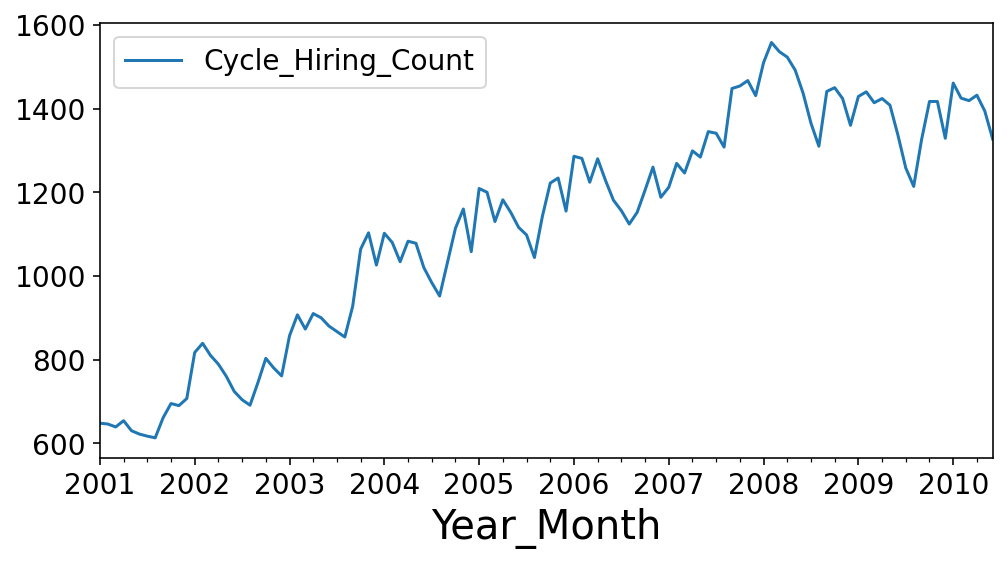

In [ ]:
#Observe the data variation
df.plot.line(x = 'Year_Month', y = 'Cycle_Hiring_Count')
plt.show()
#In the above graph we can see that there is an overall increasing trend in the data along with some seasonal variations

In [ ]:
#Plot Monthly variation of dataset
plot_monthly_variation = df

In [ ]:
# only storing month for each index 
mon = df['Year_Month']

In [ ]:
# decompose yyyy-mm data-type 
temp= pd.DatetimeIndex(mon)

In [ ]:
## assign month part of that data to ```month``` variable
month = pd.Series(temp.month)

In [ ]:
# dropping month from to_plot_monthly_variation
plot_monthly_variation = plot_monthly_variation.drop(['Year_Month'], axis = 1)

In [ ]:
# join months so we can get month to average monthly rider mapping
plot_monthly_variation = plot_monthly_variation.join(month)

In [ ]:
# A quick glance
plot_monthly_variation.head()

,Cycle_Hiring_Count,Year_Month
0,648,1
1,646,2
2,639,3
3,654,4
4,630,5


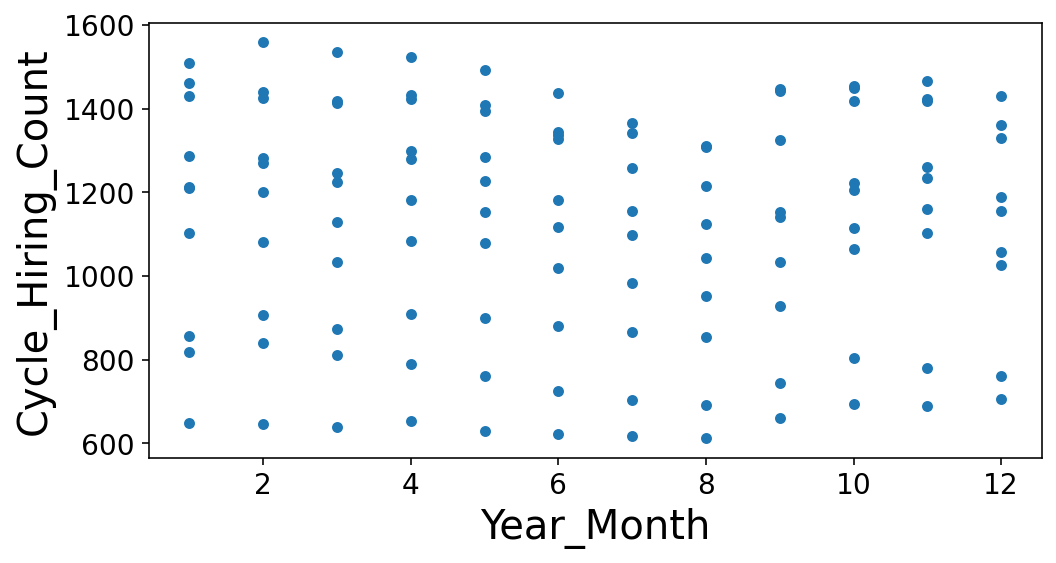

In [ ]:
plot_monthly_variation.plot.scatter(x = 'Year_Month', y = 'Cycle_Hiring_Count')
plt.show()

To understand this curve more effectively look at the every row from bottom to top and see each year's variation.To understand yearly variation take a look at each column representing a month

**Bike Data**

In [ ]:
# Load and sort the dataframe.
df = pd.read_pickle('Timesehome_dat.pkl')
df.set_index('last_communication_time', inplace=True)
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)
df.head(10)

,execution_time,available_bikes,available_docks,id,lat,lon,st_address,station_name,status_key,status_value,test_station,total_docks
last_communication_time,,,,,,,,,,,,
2016-09-18 16:58:36,2016-09-18 16:59:51,4,43,496,40.737262,-73.99239,E 16 St & 5 Ave,E 16 St & 5 Ave,1,In Service,f,47
2016-09-18 16:58:36,2016-09-18 17:01:47,4,43,496,40.737262,-73.99239,E 16 St & 5 Ave,E 16 St & 5 Ave,1,In Service,f,47
2016-09-18 17:02:29,2016-09-18 17:03:42,7,40,496,40.737262,-73.99239,E 16 St & 5 Ave,E 16 St & 5 Ave,1,In Service,f,47
2016-09-18 17:02:29,2016-09-18 17:05:48,7,40,496,40.737262,-73.99239,E 16 St & 5 Ave,E 16 St & 5 Ave,1,In Service,f,47
2016-09-18 17:07:06,2016-09-18 17:07:44,7,40,496,40.737262,-73.99239,E 16 St & 5 Ave,E 16 St & 5 Ave,1,In Service,f,47
2016-09-18 17:08:37,2016-09-18 17:09:39,6,41,496,40.737262,-73.99239,E 16 St & 5 Ave,E 16 St & 5 Ave,1,In Service,f,47
2016-09-18 17:10:43,2016-09-18 17:11:56,5,42,496,40.737262,-73.99239,E 16 St & 5 Ave,E 16 St & 5 Ave,1,In Service,f,47
2016-09-18 17:10:43,2016-09-18 17:13:52,5,42,496,40.737262,-73.99239,E 16 St & 5 Ave,E 16 St & 5 Ave,1,In Service,f,47
2016-09-18 17:15:18,2016-09-18 17:15:47,7,40,496,40.737262,-73.99239,E 16 St & 5 Ave,E 16 St & 5 Ave,1,In Service,f,47


In [ ]:
# Pick out our time series object
# and fix it to a 5-min sampling period
y = df.available_bikes
y.index.name = 'time'
y = y.resample('5T').last()
y.head()

time
2016-09-18 16:55:00     4.0
2016-09-18 17:00:00     7.0
2016-09-18 17:05:00     6.0
2016-09-18 17:10:00     5.0
2016-09-18 17:15:00    10.0
Freq: 5T, Name: available_bikes, dtype: float64

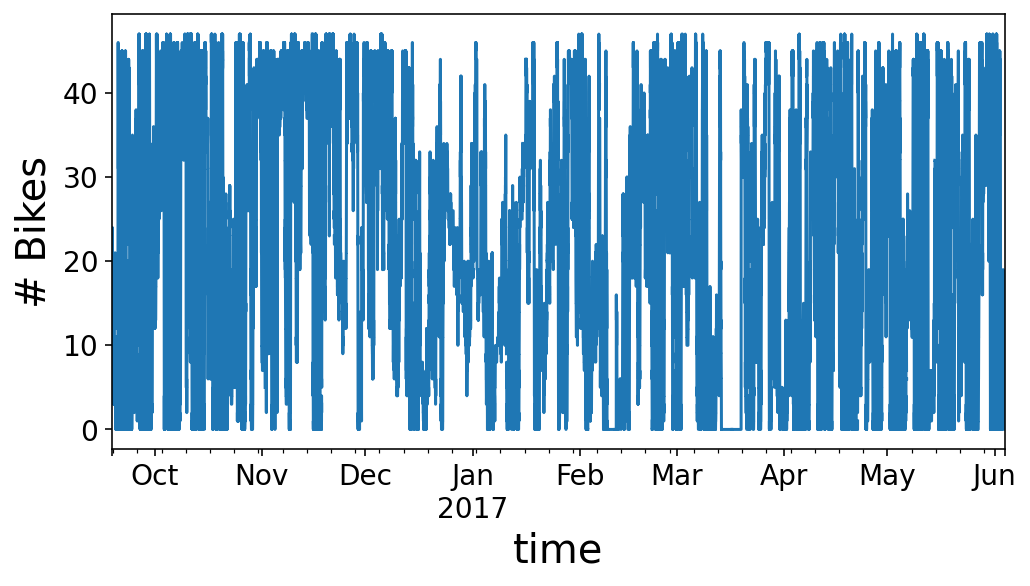

In [ ]:
ax = y.plot();
ax.set_ylabel('# Bikes');

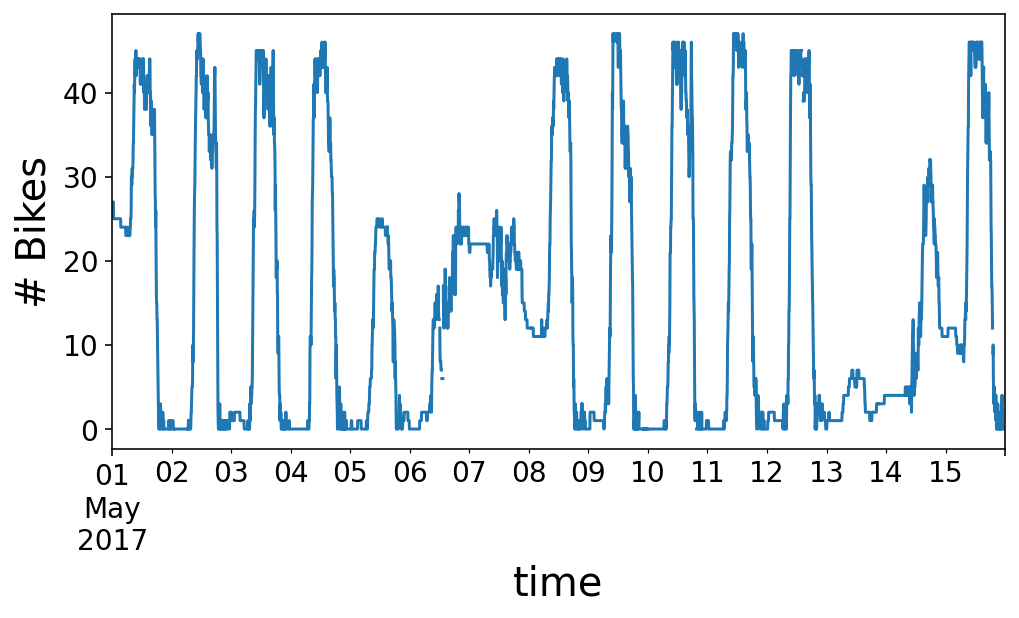

In [ ]:
y.loc['2017-05-01':'2017-05-15'].plot();
plt.ylabel('# Bikes');

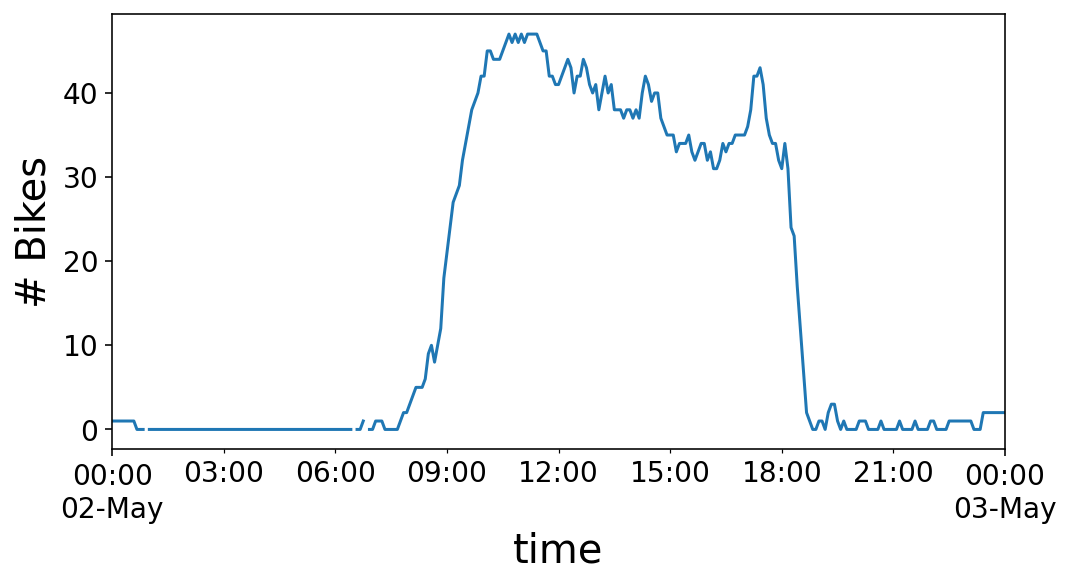

In [ ]:
y.loc['2017-05-02 00:00:00':'2017-05-03 00:00:00'].plot();
plt.ylabel('# Bikes');

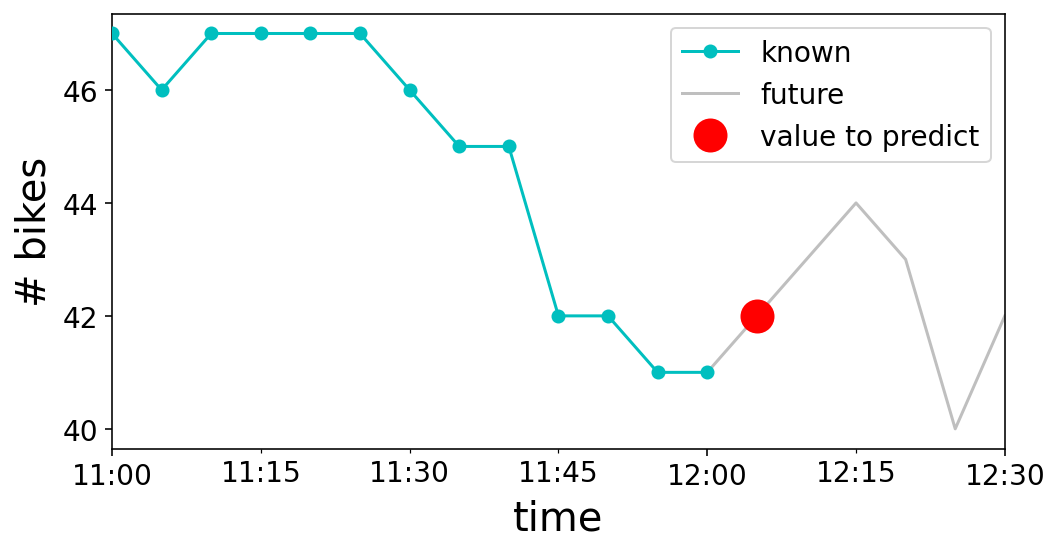

In [ ]:
known = y.loc['2017-05-02 11:00:00':'2017-05-02 12:00:00']
unknown = y.loc['2017-05-02 12:00:00':'2017-05-02 12:30:00']
to_predict = y.loc['2017-05-02 12:05:00':'2017-05-02 12:06:00']

fig, ax = plt.subplots();
known.plot(ax=ax, c='c', marker='o', zorder=3);
unknown.plot(ax=ax, c='grey', alpha=0.5);
to_predict.plot(ax=ax, c='r', marker='o', markersize=16,
                linestyle='');

ax.legend(['known', 'future', 'value to predict']);
ax.set_ylabel('# bikes');